In [1]:
import random
import math
import numpy as np
import tensorflow as tf
import pickle

## Tic-Tac-Toe engine

In [2]:
from libs.TicTacToe import TicTacToe

In [3]:
state = np.array([0., 0., -1., -1., 1., -1., 1., 1., 0.])
TicTacToe().get_available_actions(state)

array([1., 1., 0., 0., 0., 0., 0., 0., 1.])

In [4]:
ttt = TicTacToe()

while ttt.status=="Ongoing":

    valid_moves = ttt.next_moves()
    new_board = random.choice(valid_moves)
    ttt.play(new_board)
    print(np.reshape(ttt.board, (3,3)),"\n")
    if len(valid_moves)==0:
        break

print("[Winner]:",ttt.winner)

[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[ 0.  0.  1.]
 [-1.  0.  0.]
 [ 0.  0.  0.]] 

[[ 0.  0.  1.]
 [-1.  0.  1.]
 [ 0.  0.  0.]] 

[[ 0.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  0.]] 

[[ 0.  0.  1.]
 [-1.  1.  1.]
 [-1.  0.  0.]] 

[[-1.  0.  1.]
 [-1.  1.  1.]
 [-1.  0.  0.]] 

[Winner]: -1


## Create policy and probability model

In [5]:
from libs.model import create_az_model

In [6]:
model = create_az_model()

In [7]:
model.summary()

Model: "tictactoe_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 9)           0           ['input_1[0][0]']                
 da)                                                                                              
                                                                                                  
 tf.cast (TFOpLambda)           (None, 9)            0           ['tf.__operators__.add[0][0]']   
                                                                                                  
 tf.one_hot (TFOpLambda)        (None, 9, 3)         0           ['tf.cast[0][0]']  

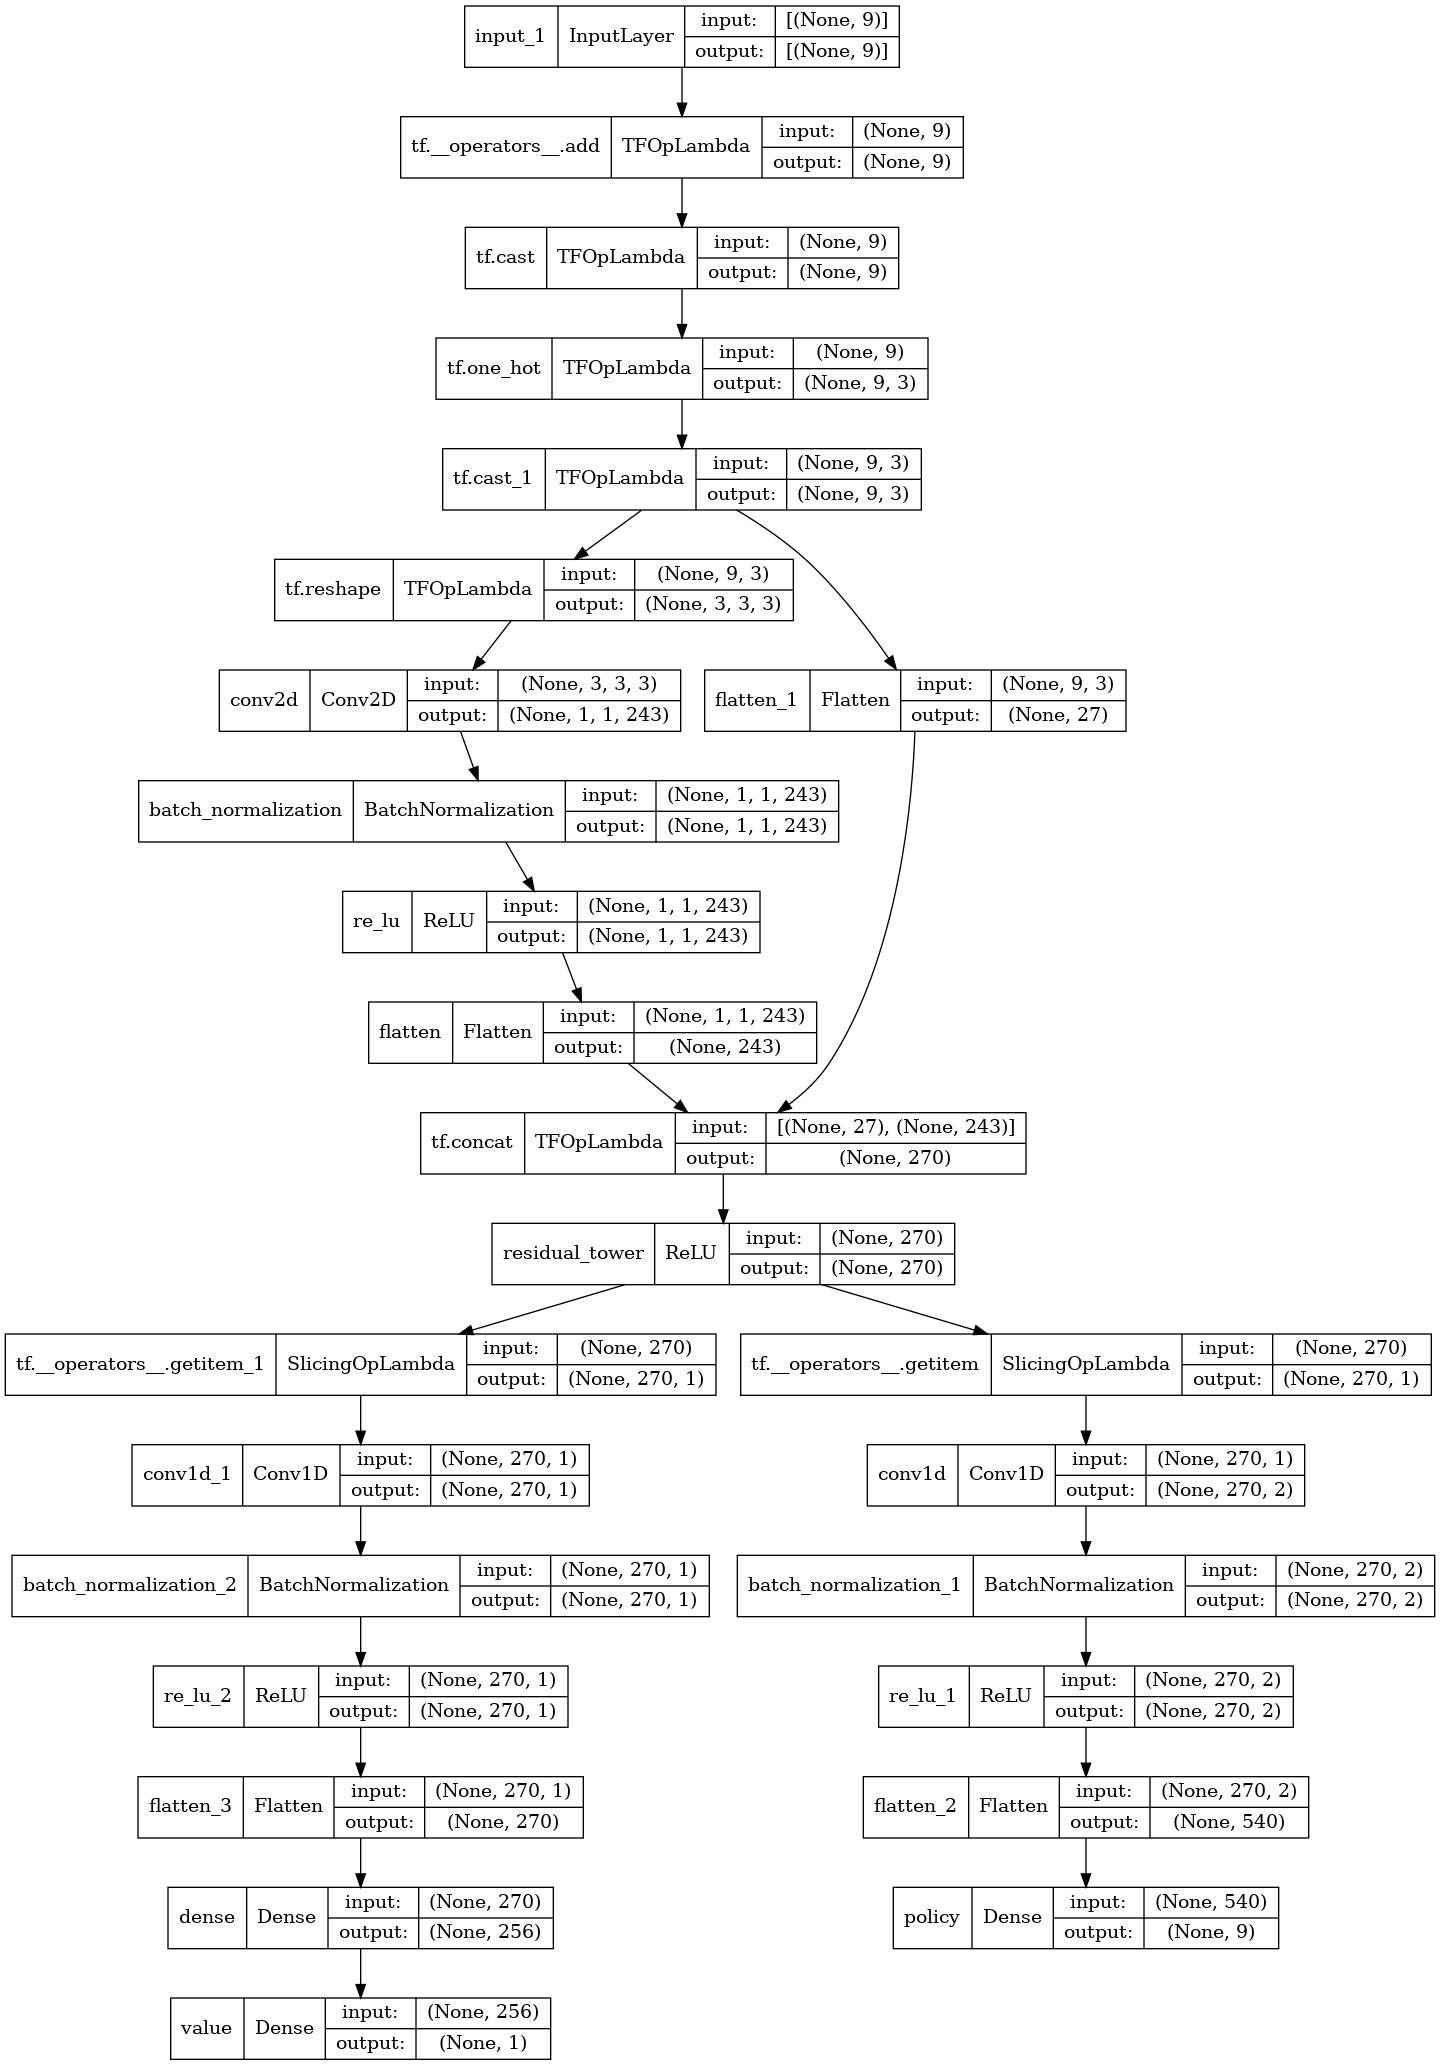

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Monte Carlo Tree Search

In [9]:
from libs.MCTS import MCTS

In [10]:
mcts = MCTS(game=TicTacToe(), n_simulations=100)

In [11]:
state = np.array([0., 0., -1., -1., 1., -1., 1., 1., 0.])

In [12]:
root = mcts.run(model=model, state=state, player=1)

In [13]:
root

State:
[ 0.  0. -1. -1.  1. -1.  1.  1.  0.]
Player:1
Value:0.97
Leaf:False
Visits:100
Children:
 -0: prior=0.3121098050233156
 -1: prior=0.2779629584810606
 -8: prior=0.40992723649562374

# Training

In [14]:
from libs.Trainer import Trainer

In [15]:
trainer = Trainer(game = TicTacToe, mcts = MCTS, model=create_az_model())

In [16]:
with open('libs/datasets/1000_tictactoe_temperature_1.pickle', 'rb') as handle:
    dataset = pickle.load(handle)

In [17]:
fit_history = trainer.train(dataset, n_epochs=1000, batch_size=20, learning_rate=1e-4)

Epoch 1/1000
355/355 [==============================] - 3s 5ms/step - loss: 2.7398 - policy_loss: 2.0142 - value_loss: 0.6966 - policy_mean_squared_error: 0.0257 - value_mean_squared_error: 0.6966 - lr: 1.0000e-04
Epoch 2/1000
355/355 [==============================] - 2s 5ms/step - loss: 2.3737 - policy_loss: 1.7375 - value_loss: 0.6074 - policy_mean_squared_error: 0.0179 - value_mean_squared_error: 0.6074 - lr: 1.0000e-04
Epoch 3/1000
355/355 [==============================] - 1s 4ms/step - loss: 2.2793 - policy_loss: 1.6753 - value_loss: 0.5752 - policy_mean_squared_error: 0.0154 - value_mean_squared_error: 0.5752 - lr: 1.0000e-04
Epoch 4/1000
355/355 [==============================] - 1s 4ms/step - loss: 2.2222 - policy_loss: 1.6386 - value_loss: 0.5549 - policy_mean_squared_error: 0.0138 - value_mean_squared_error: 0.5549 - lr: 1.0000e-04
Epoch 5/1000
355/355 [==============================] - 1s 4ms/step - loss: 2.1749 - policy_loss: 1.6121 - value_loss: 0.5341 - policy_mean_squa

355/355 [==============================] - 1s 4ms/step - loss: 2.0262 - policy_loss: 1.5303 - value_loss: 0.4674 - policy_mean_squared_error: 0.0075 - value_mean_squared_error: 0.4674 - lr: 2.6511e-33
Epoch 39/1000
355/355 [==============================] - 1s 4ms/step - loss: 2.0246 - policy_loss: 1.5331 - value_loss: 0.4629 - policy_mean_squared_error: 0.0077 - value_mean_squared_error: 0.4629 - lr: 5.9307e-35
Epoch 40/1000
355/355 [==============================] - 1s 4ms/step - loss: 2.0250 - policy_loss: 1.5311 - value_loss: 0.4653 - policy_mean_squared_error: 0.0076 - value_mean_squared_error: 0.4653 - lr: 1.2005e-36
Epoch 41/1000
355/355 [==============================] - 1s 4ms/step - loss: 2.0213 - policy_loss: 1.5294 - value_loss: 0.4634 - policy_mean_squared_error: 0.0075 - value_mean_squared_error: 0.4634 - lr: 2.1988e-38
Epoch 42/1000
355/355 [==============================] - 1s 4ms/step - loss: 2.0265 - policy_loss: 1.5336 - value_loss: 0.4643 - policy_mean_squared_error

In [18]:
trainer.save_model()

INFO:tensorflow:Assets written to: saved_model/alpha_zero_model/assets


In [19]:
trainer.model.predict(np.array([[0., 0., -1., -1., 1., -1., 1., 1., 0.]]))

(array([[8.4791765e-02, 9.3001589e-02, 2.4161248e-04, 3.8688295e-04,
         2.9234528e-03, 4.0935454e-04, 3.3309087e-04, 3.3056652e-04,
         8.1758165e-01]], dtype=float32),
 array([[0.9593148]], dtype=float32))

In [20]:
trainer.model.predict(np.array([[0., 0., 0., 0., -1., 1., -1., 0., 0.]]))

(array([[6.1301425e-02, 9.2193402e-02, 6.2331605e-01, 5.0530434e-02,
         6.2191265e-04, 4.4110999e-03, 1.8099423e-03, 5.7136446e-02,
         1.0867933e-01]], dtype=float32),
 array([[-0.6590487]], dtype=float32))